## ALGORITMO SVM - CLASIFICADOR

Las **Máquinas de Vectores de Soporte (Support Vector Machine - SVM)** se utilizan generalmente para problemas de clasificación, pero pueden emplearse en problemas de clasificación y de regresión.    
- Pueden manejar fácilmente varias variables continuas y categóricas.    
- La SVM crea un hiperplano en un espacio multidimensional para separar las distintas clases.    
- La SVM genera un hiperplano óptimo de forma iterativa, que se utiliza para minimizar un error.    

La idea básica de las SVM es hallar el hiperplano de máximo margen (MMH) que divida mejor el conjunto de datos en clases.   

<img width="460" height="300" src="img/svm.png" >      

**Vectores de soporte**   

Los *vectores de soporte* son los puntos de datos más próximos al hiperplano. Estos puntos son los que definen mejor la línea de separación calculando los márgenes. Son los puntos más relevantes para la creación del clasificador.

**Hiperplano**   

Un *hiperplano* es un plano de decisión que separa el conjunto de datos en diferentes clases.

**Margen**   

El *margen* es el espacio existente entre las dos líneas ('imaginarias') que forman los puntos de cada clase más cercanos. Se calcula como la distancia perpendicular de la línea a los vectores de soporte o puntos más cercanos. Si el margen es mayor entre las clases, se considera un buen margen; un margen menor es un mal margen.

## ¿Cómo funciona SVM? 

- El objetivo principal es segregar el conjunto de datos dado de la mejor manera posible.    
- La distancia entre los puntos más cercanos se conoce como *margen*.    
- El objetivo es seleccionar un **hiperplano** con el máximo margen posible entre vectores de soporte en el conjunto de datos dado.    
   

SVM busca el hiperplano de máximo margen en los pasos siguientes: 

1. Generar hiperplanos que segreguen las clases de la mejor manera. La figura de la izquierda muestra tres hiperplanos: negro, azul y naranja. Aquí, el azul y el naranja tienen mayor error de clasificación, pero el negro separa correctamente las dos clases. 

2. Selecciona el hiperplano con la máxima segregación de los puntos de datos más cercanos, como se muestra en la figura de la derecha.      


<img width="700" height="300" src="img/svm2.png">   


 

## Tratar con planos no lineales e inseparables (kernel trick)   

Algunos problemas no pueden resolverse utilizando el hiperplano lineal, como se muestra en la figura siguiente (lado izquierdo).

En ese caso, las SVM utilizan el denominado **"truco del kernel"** para transformar el espacio de entrada en un espacio de mayor dimensión, como se muestra a la derecha.    
Los puntos de datos se representan en el eje x y el eje z (dónde **z** es la suma al cuadrado de **x** e **y**: **$z=x^2+y^2$**). Ahora se puede dividir fácilmente estos puntos utilizando la separación lineal.   


<img width="700" height="300" src="img/svm3.png">   



# Codificación de un modelo SVM clasificador

In [1]:
from sklearn import datasets

#Cargamos el dataset de cancer de mama
cancer = datasets.load_breast_cancer()


## Exploración básica de datos

In [ ]:
# Mostrar la informacion del dataset (caracteristicas)
print("Features: ", cancer.feature_names)

# Mostrar los nombres de las etiquetas de las clases(0: Maligno, 1: Benigno
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


### Analizamos algunas propiedades más

In [ ]:
# Forma de los datos
cancer.data.shape


(569, 30)

In [ ]:
# Primero 5 elementos de los datos
print(cancer.data[0:5])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

Revisamos el conjunto de etiquetas (target)

In [5]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### División de los conjuntos de TRAIN y TEST

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% train - 30% test


### Construcción y entrenamiento del modelo   

Creamos un modelo de máquina de vectores de soporte.    
En primer lugar, se importa el módulo SVM y se crea el objeto clasificador de vectores de soporte, pasando el argumento kernel como kernel lineal en la función SVC().

A continuación, se entrena el modelo al conjunto de train utilizando **fit()** y, seguidamente, realiza la predicción sobre el conjunto de test utilizando **predict()**.

In [ ]:
#Importar el modulo de SVM
from sklearn import svm

#Creamos un clasificador SVM
clf = svm.SVC(kernel='linear') # Linear Kernel. 

#Entrenamos el modelo usando los conjuntos de train
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
#Realizamos la prediccion usando el conjunto de test
y_pred = clf.predict(X_test)

### Evaluación del modelo

In [9]:
#Importar la libreria de metricas para evaluar el rendimiento del modelo
from sklearn import metrics

# Accuracy: cuantos elementos fueron clasificados correctamente
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


Se ha obtenido un índice de clasificación del 96,49 %, que se considera un valor de "accuracy" realmente bueno

Terminamos realizando comprobaciones con dos métricas más:   
- ***Precision***: es la relación entre las observaciones positivas predichas correctamente y el total de observaciones positivas predichas.
- ***Recall***: (Sensibilidad) que es la proporción de casos positivos detectados correctamente por el clasificador respecto al total de observaciones de la clase real

In [10]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


Se han obtenido una **precisión** del 98 % y un **recall** del 96 %, que son muy buenos porcentajes.   
Tenemos, por tanto, un modelo realmente bueno a la hora de realizar predicciones sobre probabilidad de que el cáncer sea maligno o benigno

## Informe (Classification Report)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## Ejemplo SVM sobre datos sintéticos   

Generamos datos sintéticos para trabajar con un espacio de dos dimensiones y poder visualizar gráficamente el proceso

### Importamos librerías necesarias

In [17]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Generamos sintéticamente nuestro dataset

Nuestra variable de salida (variable **y**) va a disponer de 2 clases

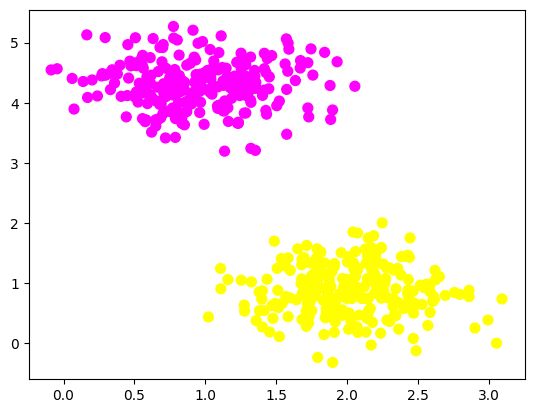

In [14]:
X, y = make_blobs(n_samples=500, centers=2,         # Se genera un conjunto de datos con 500 muestras y 2 centros. 
                  									# make_blobs es una función de scikit-learn que genera un conjunto de datos de puntos en un espacio de dos dimensiones.
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.show() 

Lo que hace el algoritmo SVM no es sólo trazar una línea entre dos clases, sino considerar una región alrededor de la línea de una anchura determinada. He aquí un ejemplo de lo que puede parecer:

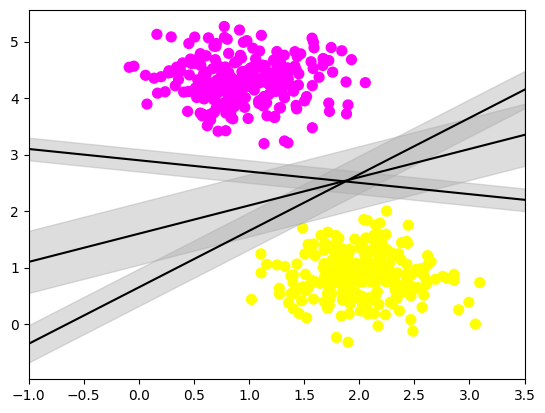

In [15]:
# creando un espacio lineal entre -1 y 3.5
xfit = np.linspace(-1, 3.5)

# graficando los puntos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# graficando una linea entre los diferentes conjuntos de datos
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 	# se generan 3 lineas diferentes
	yfit = m * xfit + b													# se calcula la pendiente y la intersección
	plt.plot(xfit, yfit, '-k')											# se grafica la linea
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 		# se rellena el espacio entre las lineas 
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)														# se establece el rango de x
plt.show()


Este es el comportamiento del SVM, que optimiza un modelo discriminante lineal que representa la distancia perpendicular entre los conjuntos de datos.

## Aplicando SVM sobre el dataset IRIS

In [6]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
#carga del dataset iris desde sklearn
iris = datasets.load_iris()


In [7]:
X_train = iris.data[:, 2:4]  #se seleccionan las dos ultimas caracteristicas. Longitud y ancho del petalo
y_train = iris.target

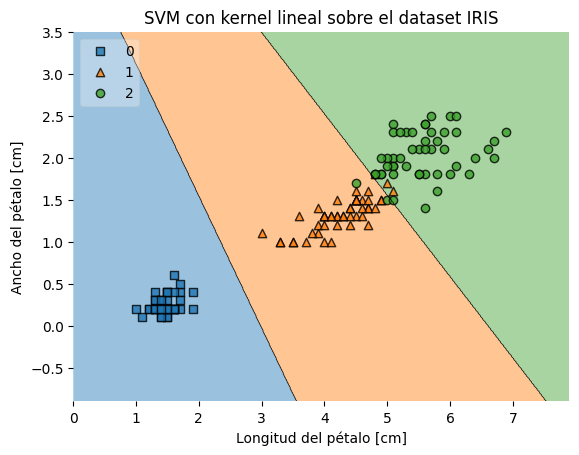

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=1) 	# se crea un modelo SVM con kernel lineal y parámetro C=1.0
model.fit(X_train, y_train) 							# se entrena el modelo con los datos

plot_decision_regions(X_train, 
                      y_train, 
                      clf=model, 
                      legend=2) 	                            # se grafican las regiones de decisión del modelo
plt.xlabel('Longitud del pétalo [cm]') 							
plt.ylabel('Ancho del pétalo [cm]') 								
plt.title('SVM con kernel lineal sobre el dataset IRIS') 				
plt.show() 														

## Ejemplo usando un Kernel de tipo no lineal

In [11]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

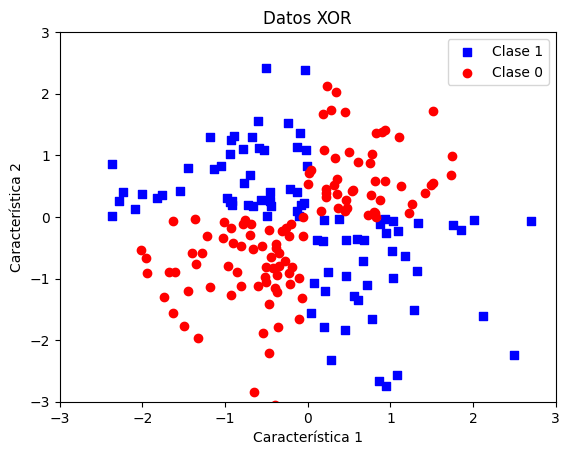

In [ ]:
X_xor = np.random.randn(200, 2) # Genera 200 puntos aleatorios en 2D (distribución normal estándar. Media 0, desviación estándar 1). Se generan valores entre -3 y 3 aproximadamente.

# Genera las etiquetas XOR: Clase 1 si una característica es positiva y la otra negativa, Clase 0 en caso contrario.
y_xor = np.logical_xor(X_xor[:, 0] > 0, 
                       X_xor[:, 1] > 0) 
y_xor = np.where(y_xor, 1, 0)


plt.scatter(X_xor[y_xor == 1, 0],   
            X_xor[y_xor == 1, 1],
               c='b', marker='s',
               label='Clase 1')
plt.scatter(X_xor[y_xor == 0, 0],   
            X_xor[y_xor == 0, 1],
               c='r', marker='o',
               label='Clase 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.title('Datos XOR')
plt.show()

Como se aprecia en la gráfica, son dos clases que no son linealmente separables

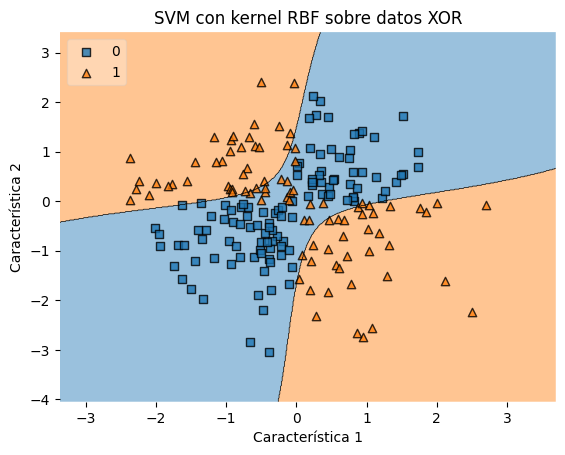

In [ ]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.10, C=10.0) # Se crea un modelo SVM con kernel RBF (Radial Basis Function), parámetro gamma=0.10 y C=10.0
svm.fit(X_xor, y_xor) 										
plot_decision_regions(X_xor, 
                      y_xor, 
                      clf=svm, 
                      legend=2) 	                            
plt.xlabel('Característica 1') 							
plt.ylabel('Característica 2')
plt.title('SVM con kernel RBF sobre datos XOR')
plt.legend
plt.show()

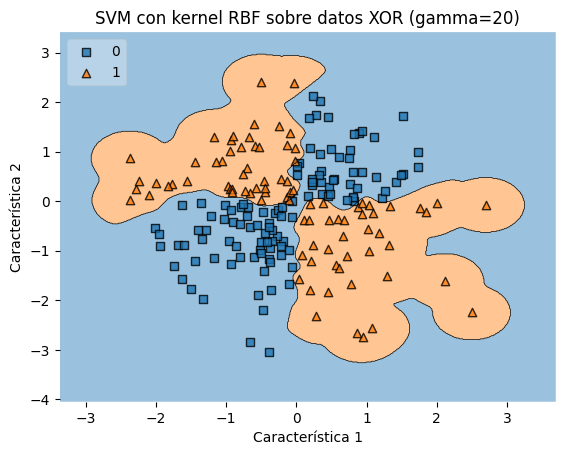

In [21]:
svm = SVC(kernel='rbf', gamma=20, C=10.0, random_state=1) 
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, 
                      y_xor, 
                      clf=svm, 
                      legend=2) 	                            
plt.xlabel('Característica 1') 							
plt.ylabel('Característica 2')
plt.title('SVM con kernel RBF sobre datos XOR (gamma=20)')
plt.legend
plt.show()

Usamos de nuevo el dataset IRIS

In [15]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
#carga del dataset iris desde sklearn
iris = datasets.load_iris()

In [16]:
X_train = iris.data[:, 2:4]  #se seleccionan las dos ultimas caracteristicas. Longitud y ancho del petalo
y_train = iris.target

### Preparación del modelo SVM   

La transformación (el Kernel RBF (radius basis function - función de base radial)) que se utiliza a continuación, responde a la siguiente función matemática:   
$$ 
K(x, x') = e ^ {-\gamma||x-x'||^2} 
$$   

Dónde:   

- $x$ y $x'$ son puntos del espacio original.
- $||x - x'||^2$ es la distancia entre esos puntos.
- $\gamma$ (gamma) es un parámetro que controla cuánto afecta la transformación.
- La función exponencial $e^{-valor}$ hace que los puntos cercanos se vuelvan similares en el nuevo espacio.    

En definitiva, se convierte la distancia entre los puntos en una medida de similitud (Matemáticamente: qué tan parecidos son dos puntos o datos entre sí), generando una nueva representación de los datos.

Es decir, la función RBF mide la simiilitud entre puntos y transforma los datos hacia un espacio superior sobre el que nuestra SVM pueda aplicar una separación lineal.

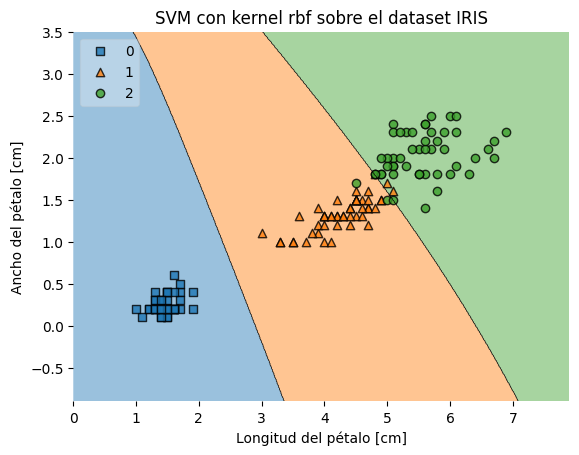

In [19]:
model = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1) 	# se crea un modelo SVM con kernel lineal y parámetro C=1.0
model.fit(X_train, y_train) 							# se entrena el modelo con los datos

plot_decision_regions(X_train, 
                      y_train, 
                      clf=model, 
                      legend=2) 	                            # se grafican las regiones de decisión del modelo
plt.xlabel('Longitud del pétalo [cm]') 							
plt.ylabel('Ancho del pétalo [cm]') 								
plt.title('SVM con kernel rbf sobre el dataset IRIS') 				
plt.show() 		

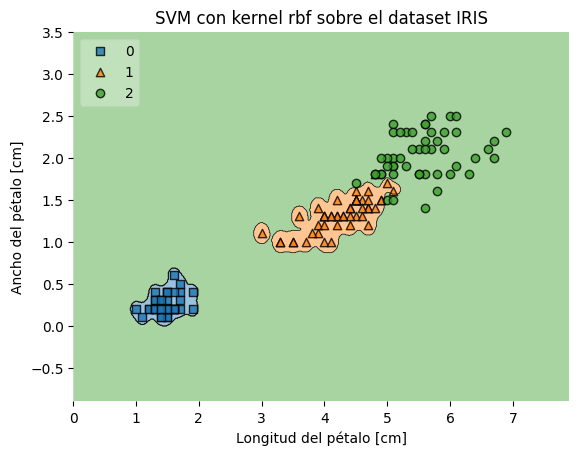

In [20]:
model = SVC(kernel='rbf', gamma=100, C=1.0, random_state=1) 	# se crea un modelo SVM con kernel lineal y parámetro C=1.0
model.fit(X_train, y_train) 							# se entrena el modelo con los datos

plot_decision_regions(X_train, 
                      y_train, 
                      clf=model, 
                      legend=2) 	                            # se grafican las regiones de decisión del modelo
plt.xlabel('Longitud del pétalo [cm]') 							
plt.ylabel('Ancho del pétalo [cm]') 								
plt.title('SVM con kernel rbf sobre el dataset IRIS') 				
plt.show() 		

Hay, en este último caso, un claro sobreajuste del modelo a los datos de entrenamiento debido a un valor muy alto del parámetro gamma. Este parámetro, por tanto, es el que se debe modificar para intentar lograr resultados más "correctos" sobre este dataset concreto.

In [24]:
import seaborn as sns
from sklearn.datasets import make_blobs

Generamos datos aleatorios.

In [25]:
X, y = make_blobs(n_samples = [100, 250], 
                  random_state = 0, 
                  cluster_std = [0.5, 2.0], 
                  centers = [(0, 0), (2, 2)])

Calculamos también los valores mínimos y máximos generados en ambas dimensiones, añadiendo un margen para su graficado más claro:

In [26]:
minX = min(X[:, 0]) - 1
maxX = max(X[:, 0]) + 1
minY = min(X[:, 1]) - 1
maxY = max(X[:, 1]) + 1

Graficamos.

<Axes: >

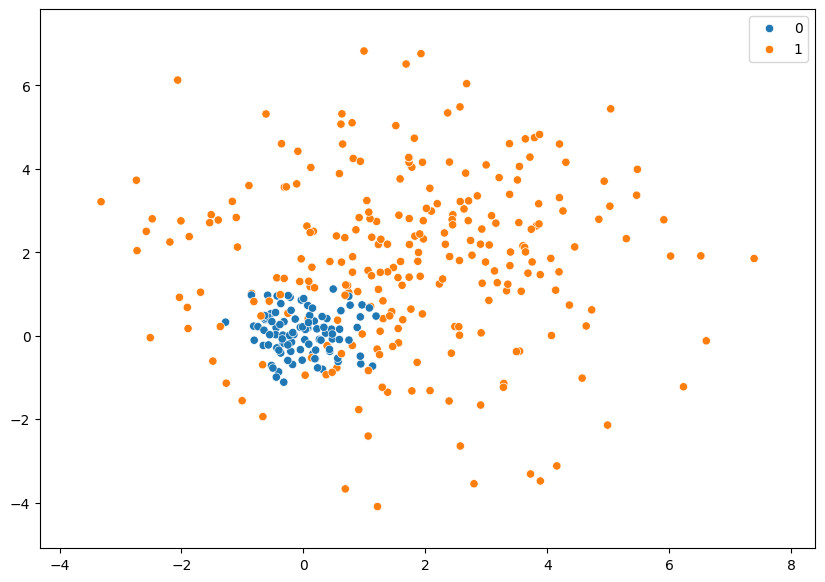

In [27]:
fig, ax = plt.subplots(figsize = (10, 7))
plt.axis([minX, maxX, minY, maxY]) 
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

Nuevamente, volvemos a preparar el modelo SVM.

In [29]:
model = SVC(gamma = "auto", kernel = "rbf") # Se crea un modelo de SVM con un kernel rbf (radial basis function) y con gamma auto (el parametro gamma es el coeficiente del kernel para 'rbf')
model.fit(X, y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Predicciones

In [30]:
sample = np.array([0, 0]).reshape(-1, 2) # clase 0. Color azul
model.predict(sample)

array([0])

In [31]:
sample = np.array([1, 2]).reshape(-1, 2) # clase 1. Color naranja
model.predict(sample)

array([1])

El resultado será clase azul (0) o clase naranja (1)

Si se muestra la distribución de las áreas a las que se asignaría cada clase, se obtendrá la siguiente gráfica (sobre la que se muestran los puntos del conjunto de train):

In [32]:
# Funcion para predecir la clase de un punto en el plano
def p(model, x, y):
    sample = np.array([x, y]).reshape(-1, 2)
    return model.predict(sample)[0]
pv = np.vectorize(p)

In [33]:
n = 100 # Numero de puntos a predecir
ax = np.linspace(minX, maxX, n) # Se crea un espacio lineal entre el minimo y maximo de x
ay = np.linspace(minY, maxY, n) # Se crea un espacio lineal entre el minimo y maximo de y
xx, yy = np.meshgrid(ax, ay) # Se crea una malla de puntos

In [34]:
# Se cambia el color de la paleta
palette = ["IndianRed", "CornflowerBlue"]

<Axes: >

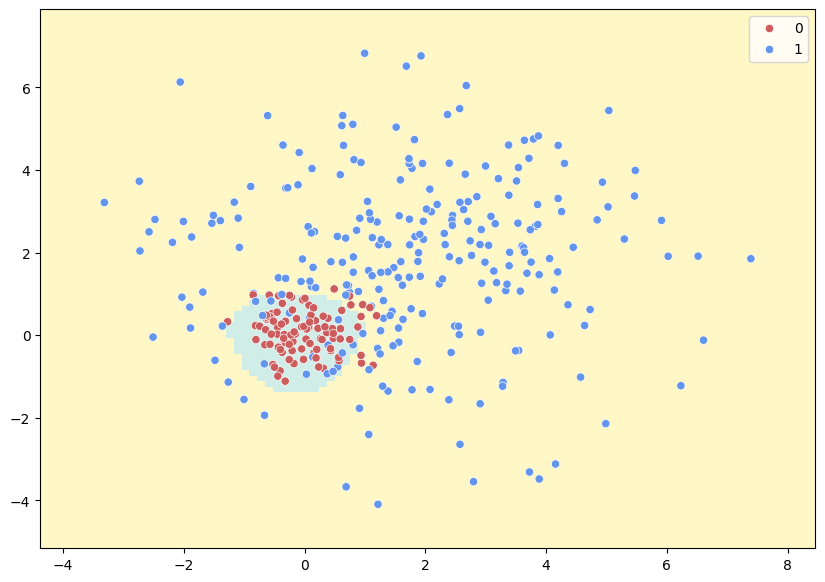

In [35]:
zz = pv(model, xx, yy) # Se predice la clase de cada punto en la malla
# Se grafica la malla de puntos
fig, ax = plt.subplots(figsize = (10, 7))
plt.pcolormesh(xx, yy, zz, cmap = plt.get_cmap('Set3'), alpha = 0.4) # Se colorea la malla de puntos
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y, palette = palette) # Se grafican los puntos

Si fijamos un valor de C alto (penalizando los errores en la clasificación), el resultado es el siguiente:

In [36]:
# El parámetro "C" es el parámetro de regularización, que controla el balance entre la complejidad del modelo y la cantidad de errores de entrenamiento.
# A mayor valor de "C", menor es la regularización y, por tanto, el modelo se ajusta mejor a los datos de entrenamiento.
model = SVC(gamma = "auto", kernel = "rbf", C = 100000) 
model.fit(X, y)

,C,100000
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<Axes: >

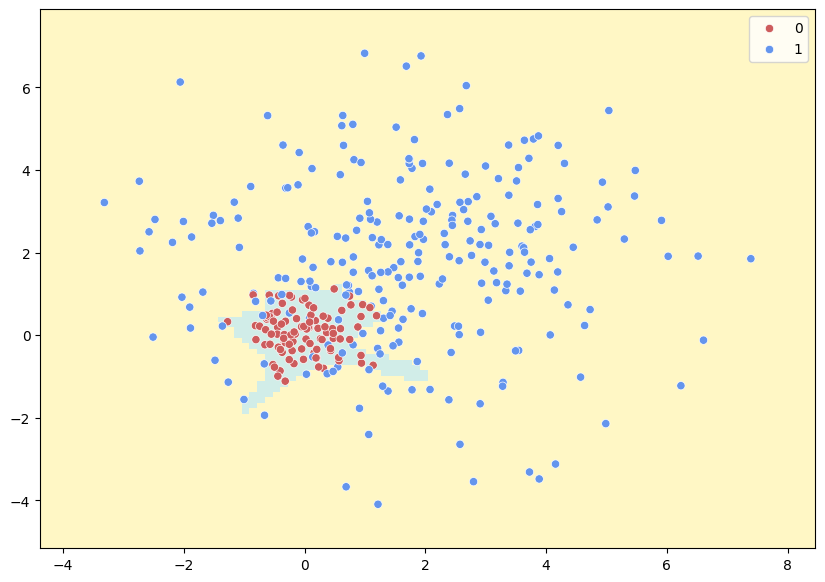

In [37]:
zz = pv(model, xx, yy)
fig, ax = plt.subplots(figsize = (10, 7))
plt.pcolormesh(xx, yy, zz, cmap = plt.get_cmap('Set3'), alpha = 0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y, palette = palette)

Vemos como en este último gráfico la zona sombreada se ajusta mejor a los puntos de color naranja, aumentando la precisión del clasificador.